In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import random
import tensorflow as tf

In [3]:
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model      

In [4]:
def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)
  trained_weight = model.get_weights()[0][0]
  trained_bias = model.get_weights()[1]
  epochs = history.epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]
  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


In [5]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""
  plt.xlabel("feature")
  plt.ylabel("label")
  plt.scatter(feature, label)

  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [6]:
my_feature = [1,3,5,11,21,43,85,171,341]
my_label = [1,2,3,4,5,6,7,8,9]

Epoch 1/75


C:\Users\singk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14869.8857 - root_mean_squared_error: 98.7267
Epoch 2/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 16927.8809 - root_mean_squared_error: 107.7328
Epoch 3/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 23616.0332 - root_mean_squared_error: 149.1025
Epoch 4/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 21893.9004 - root_mean_squared_error: 133.8632
Epoch 5/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48801.2422 - root_mean_squared_error: 209.9413
Epoch 6/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17928.0430 - root_mean_squared_error: 111.8093
Epoch 7/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 14775.2617 - root_mean_squared_error: 102.4990
Epoch 8/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 22821.0469 - root_mean_squared_error: 143.7808
Epoch 9/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 66483.8438 - root_mean_squared_error: 244.0288  
Epoch 10/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27267.3965 - root_

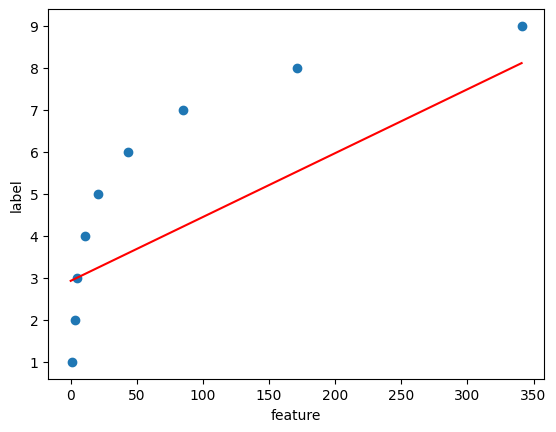

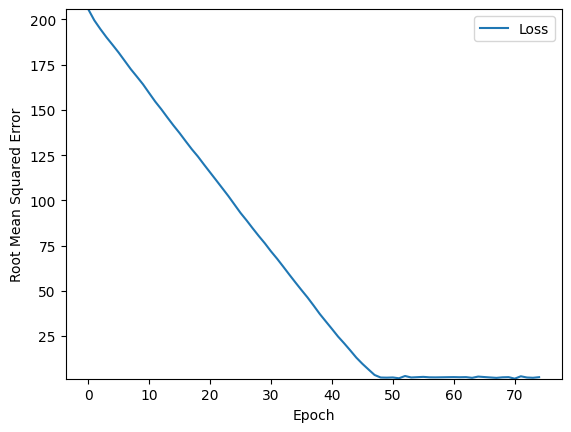

In [7]:
my_feature = np.array(my_feature)
my_label = np.array(my_label)

learning_rate = 0.01
epochs = 75
my_batch_size = 1

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [8]:
new_feature = np.array([1,3,5,11,21,43,85,171,341,391])

# ใช้โมเดลที่เทรนแล้วในการทำนาย
predictions = my_model.predict(new_feature)

# แสดงผลการทำนาย
print("Predictions for new feature:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predictions for new feature: [[2.9457257]
 [2.9761317]
 [3.0065374]
 [3.0977552]
 [3.249785 ]
 [3.58425  ]
 [4.2227745]
 [5.5302296]
 [8.114734 ]
 [8.874882 ]]
